<a href="https://colab.research.google.com/github/swilsonmfc/notebooks/blob/master/AutoML_PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyCaret

![alt text](https://www.fondation-louisbonduelle.org/wp-content/uploads/2016/10/carotte_222805396.png)

# Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#from pycaret.classification import *

In [2]:
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


# Kaggle

In [7]:
!pip install kaggle
!mkdir -p ~/.kaggle

  Created wheel for kaggle: filename=kaggle-1.5.9-py3-none-any.whl size=73270 sha256=a3d267e673d14e15eb0f21fdb8cb1b235e1bb1ac1a1f3a877a200812de787645
  Stored in directory: c:\users\marke\appdata\local\pip\cache\wheels\09\25\76\1bbe8ad0c423e8655942b6d3c781f58e0ea2791bf8ee8985b3
  Created wheel for python-slugify: filename=python_slugify-4.0.1-py2.py3-none-any.whl size=6772 sha256=8642463a52222ee89b8bb10d65b7b8fc13f2485fe8deb9bd2bd088e567e35350
  Stored in directory: c:\users\marke\appdata\local\pip\cache\wheels\48\1b\6f\5c1cfab22eacbe0095fc619786da6571b55253653c71324b5c
  Created wheel for slugify: filename=slugify-0.0.1-py3-none-any.whl size=1913 sha256=8599c21679b5b4d988428bb5446bc02aa31d5774e9617b25a91b57f182fef5ef
  Stored in directory: c:\users\marke\appdata\local\pip\cache\wheels\d4\7b\0d\bd65011a1b442843bb4043e396f727ab0f1e76050355b9156a
Successfully built kaggle python-slugify slugify


The syntax of the command is incorrect.


In [14]:
from google.colab import files
files.upload()

ModuleNotFoundError: No module named 'google.colab'

In [15]:
!mv kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

'mv' is not recognized as an internal or external command,
operable program or batch file.
'chmod' is not recognized as an internal or external command,
operable program or batch file.


# Data

In [8]:
!kaggle datasets download -d ronitf/heart-disease-uci

Traceback (most recent call last):
  File "d:\marke\anaconda3\envs\ml\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "d:\marke\anaconda3\envs\ml\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "D:\marke\Anaconda3\envs\ml\Scripts\kaggle.exe\__main__.py", line 4, in <module>
  File "d:\marke\anaconda3\envs\ml\lib\site-packages\kaggle\__init__.py", line 23, in <module>
    api.authenticate()
  File "d:\marke\anaconda3\envs\ml\lib\site-packages\kaggle\api\kaggle_api_extended.py", line 166, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in C:\Users\marke\.kaggle. Or use the environment method.


In [11]:
!unzip /content/heart-disease-uci.zip

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [12]:
!ls -al

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
df = pd.read_csv('D:/marke/python/Kaggle data/heart.csv')

In [4]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

# EDA
* age
* sex
* cp: chest pain type (4 values)
* trestbps: resting blood pressure
* chol: serum cholestoral in mg/dl
* fbs: fasting blood sugar > 120 mg/dl
* restecg: resting electrocardiographic results (values 0,1,2)
* thalach: maximum heart rate achieved
* exang: exercise induced angina
* oldpeak: oldpeak = ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
* ca: number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect 

## Age

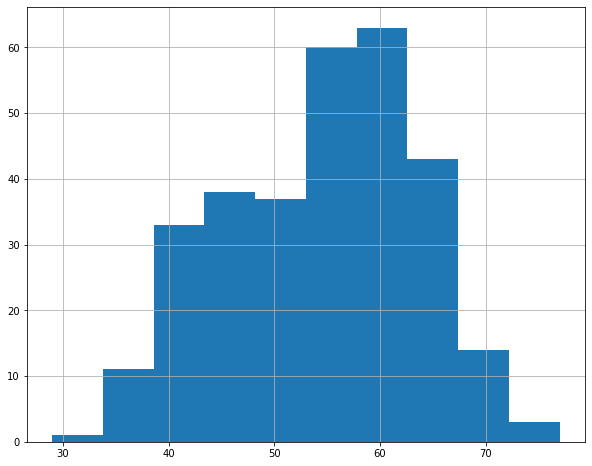

In [5]:
df.age.hist(figsize=(10,8))
plt.show()

## Sex
* There are more males than females (2-1)

In [6]:
df.groupby('sex').size().plot.bar(figsize=(10,8))
plt.title('Sex')
plt.ylabel('Count')
plt.show()

## Sex, Age & Target

In [7]:
sns.catplot(x="sex", y="age", hue="target", height=6, aspect=1.5, data=df)
plt.title('Sex, Age & Target')
plt.show()

## Chest Pain

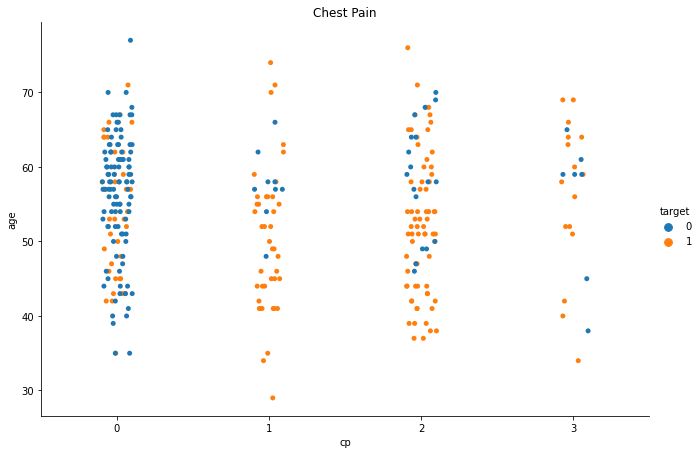

In [8]:
sns.catplot(x="cp", y="age", hue="target", height=6, aspect=1.5, data=df)
plt.title('Chest Pain')
plt.show()

## Resting Blood Pressure

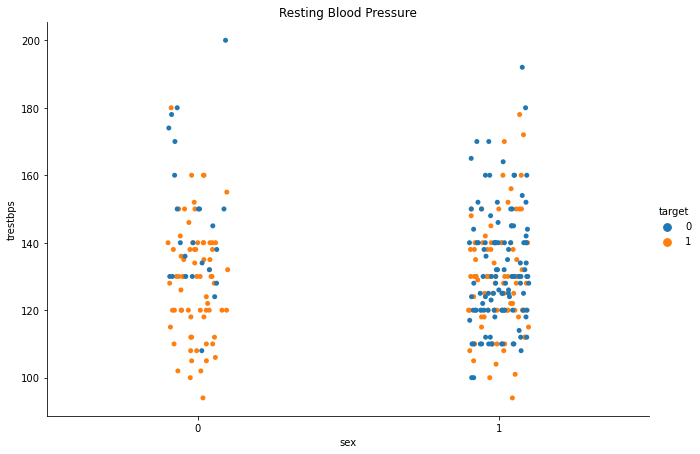

In [9]:
sns.catplot(x="sex", y="trestbps", hue="target", height=6, aspect=1.5, data=df)
plt.title('Resting Blood Pressure')
plt.show()

## Cholesterol

In [10]:
sns.catplot(x='sex', y="chol", hue="target", height=6, aspect=1.5, data=df)
plt.title('Cholesterol')
plt.show()

## Resting ECG

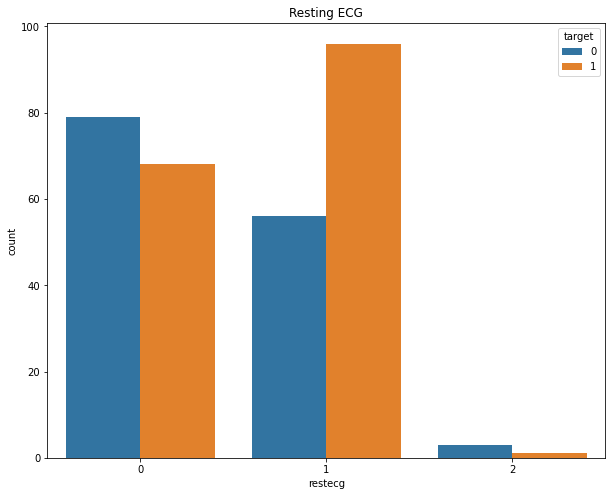

In [11]:
fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(x='restecg', hue="target", ax=ax, data=df)
plt.title('Resting ECG')
plt.show()

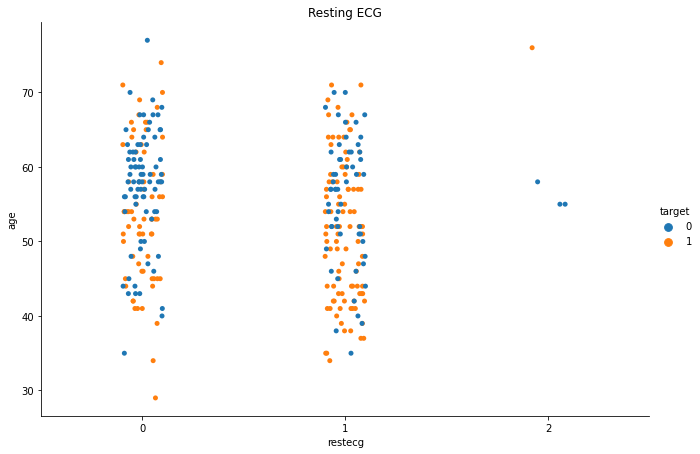

In [12]:
sns.catplot(x='restecg', y="age", hue="target", height=6, aspect=1.5, data=df)
plt.title('Resting ECG');

## Fluoroscopy Coloring

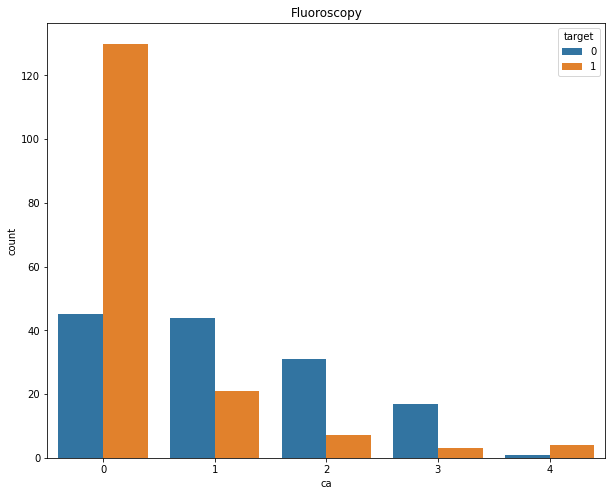

In [13]:
fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(x='ca', hue="target", ax=ax, data=df)
plt.title('Fluoroscopy')
plt.show()

## Thalassemia

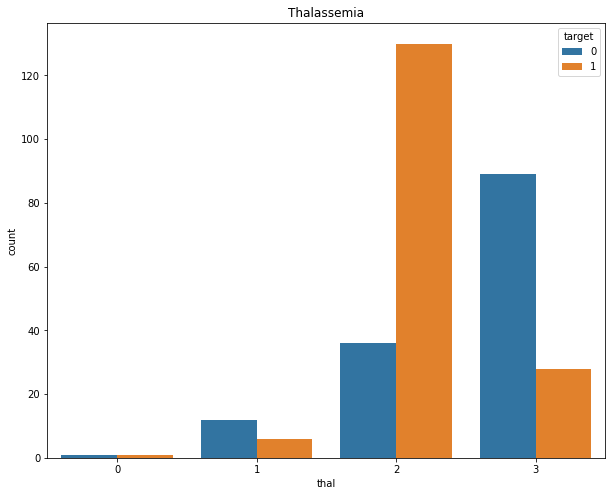

In [14]:
fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(x='thal', hue="target", ax=ax, data=df)
plt.title('Thalassemia')
plt.show()

# PyCaret
* Generates an experiment
* Takes our data and target and applies configurable pipeline steps
* Once completed, we can use the data in our experiment to test and explore model performance

![Pipeline](https://miro.medium.com/max/1400/1*jo9vPsQhQZmyXUhnrt9akQ.png)

In [15]:
exp1 = setup(df, target = 'target', silent = True) 

NameError: name 'setup' is not defined

# Compare
* Generate a series of models with cross-fold validation
* Present the results across a variety of metrics to identify promising models

In [32]:
compare_models()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=4505, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Model 
* We can generate a model using of up to 60 different models in PyCaret
* The toolkit provides plotting tools & model evaluations (appropriate for a given technique) 
* We can quickly improve a model using hyper-parameter tuning
* For tree-based models we can interpret the results using the shap library

## Logistic Regression

In [43]:
lr = create_model('lr')

In [34]:
plot_model(lr, plot = 'auc')

In [35]:
evaluate_model(lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [45]:
#tuned_lr = tune_model('lr')

In [46]:
#plot_model(tuned_lr, plot = 'parameter')

## Random Forest

In [56]:
rf = create_model('rf')
plot_model(rf, plot = 'auc')

In [57]:
evaluate_model(rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [50]:
#tuned_rf = tune_model('rf')

In [51]:
#plot_model(tuned_rf, plot = 'parameter')

In [54]:
#interpret_model(rf)

## Catboost

In [55]:
catboost = create_model('catboost')

In [59]:
interpret_model(catboost)

ImportError: shap library not found. pip install shap to use interpret_model function.

In [ ]:
interpret_model(catboost, plot = 'correlation')

In [ ]:
tuned_catboost = tune_model('catboost')

# Prediction
* Generating predictions on a model
* When new data isn't passed in this uses the hold out set in the experiment
* Two additional columns are added to the predict dataset
  * Label = The predicted class
  * Score = The predicted probability
* For tree based methods we can look at the reason for a prediction using shap

In [ ]:
predict_model(tuned_lr)

In [ ]:
predict_model(tuned_rf)

In [ ]:
interpret_model(tuned_rf, plot='reason', observation=0)

In [ ]:
predict_model(tuned_catboost)

In [ ]:
interpret_model(tuned_catboost, plot='reason', observation=0)

# Calibration
* We sort our predictions by probability
* Bin the predictions 
* Compare the fraction of positives against the percent of positives in the bin
* Using CalibratedClassifierCV we can attempt to adjust our model to be more reliable using
  * Sigmoid Method
  * Isotonic Method
* https://medium.com/analytics-vidhya/calibration-in-machine-learning-e7972ac93555

In [ ]:
plot_model(tuned_rf, plot='calibration')

In [ ]:
rf_calibrated = calibrate_model(tuned_rf)

In [ ]:
print(rf_calibrated)

In [ ]:
plot_model(rf_calibrated, plot='calibration')

In [ ]:
rf_calibrated_isotonic = calibrate_model(tuned_rf, method = 'isotonic')

In [ ]:
print(rf_calibrated_isotonic)

In [ ]:
plot_model(rf_calibrated_isotonic, plot='calibration')

# Optimize Threshold
* By default we use .5 as a decision boundary
* If we assign costs to:
  * True Positive
  * False Positive
  * True Negative
  * False Negative
* We can attempt to find an optimal setting taking into account costs

In [ ]:
optimize_threshold(tuned_rf, false_positive=-1000, false_negative = -4500)

# Ensembling

## Bagging
* Bagging involves using permuation to generate multiple models
* The models are used to vote on each prediction

In [ ]:
dt = create_model('dt')

In [ ]:
dt_bagged = ensemble_model(dt)

In [ ]:
print(dt_bagged)

In [ ]:
dt_bagged_tuned = tune_model('dt', ensemble=True, method='Bagging')

In [ ]:
print(dt_bagged_tuned)

## Boosting
* Boosting involves making a prediction with a base learner
* Incrementally improve on the prediction by using another base learner to fit to the residual

In [ ]:
dt = create_model('dt')

In [ ]:
dt_boosted = ensemble_model(dt, method = 'Boosting')

In [ ]:
print(dt_boosted)

In [ ]:
dt_boosted_tuned = tune_model('dt', ensemble=True, method='Boosting')

In [ ]:
print(dt_boosted_tuned)

## Blending
* Blending involves creating multiple models
* Averaging their predictions

### Blend Hard
* Hard voting uses the class prediction

In [ ]:
blend_hard = blend_models()

In [ ]:
print(blend_hard)

### Blend Soft
* Soft voting uses the class probability

In [ ]:
blend_soft = blend_models(method='soft')

In [ ]:
print(blend_soft)

### Specific Models

In [58]:
rf       = create_model('rf', verbose=False)
gbc      = create_model('gbc', verbose = False)
dt       = create_model('dt', verbose = False)
lightgbm = create_model('lightgbm', verbose = False)

In [ ]:
blend_specific = blend_models(estimator_list = [rf, gbc, dt, lightgbm], method = 'soft')

## Stacking

### Hard Stack
* Hard voting uses predicted class



In [37]:
stack_hard = stack_models([rf, gbc, dt, lightgbm], method='hard', plot=True)

NameError: name 'rf' is not defined

### Stack Soft
* Soft voting uses probabilities

In [38]:
stack_soft = stack_models([rf, gbc, dt, lightgbm], method='soft', plot=True)

NameError: name 'rf' is not defined

### Restacked
* Restacking refers to the ability to use the original data in addition to the scored base models
  * True = Raw + Scored
  * False = Scored

In [39]:
restack_soft = stack_models([rf, gbc, dt, lightgbm], restack=False, method='soft', plot=True)

NameError: name 'rf' is not defined

# Finalize
* Last step in supervised learning
* Use all data (train / test)
* No cross-validation
* Train final model for saving & deployment

In [40]:
rf_final = finalize_model(tuned_rf)
rf_final

NameError: name 'tuned_rf' is not defined

# Saving
* Write model to disk
* Write experiment to disk
* Pickled format

In [41]:
save_model(rf_final, model_name='random_forest_model_v1' )
save_experiment(experiment_name = 'experiment_heart_disease')

NameError: name 'rf_final' is not defined

# Deploying
* Facility for saving model to cloud
* Pull model for making predictions
* Sufficient for batch predictions - caution on per-instance predictions (better to pull model local)

```python
deploy_model(rf_final, 
             model_name = 'rf_aws', 
             platform = 'aws', 
             authentication = { 'bucket'  : 'pycaret-test' })
```

```python
predictions = predict_model(model_name = 'rf_aws', 
                            data = new_data, 
                            platform = 'aws', 
                            authentication = { 'bucket' : 'pycaret-test' })
```

# Recap
* We got to almost 86% using tuned Logistic / Random Forests
* PyCaret is losely based on R's Caret package
  * Caret is a very rich toolkit
  * PyCaret 1.0 while not a full feature port, it's a very clean, easy to use package
* Definitely consider adding it to your AutoML toolkit
  * It should make you more productive 
  * Simple workflow, diagnostics, and ensembling
  * The deployment / prediction pattern is simple and clean
* Models for:
  * Classification
  * Regression
  * Clustering
  * Anomaly Detection
  * NLP (LSA / LDA -- Topic Modeling)
  * Association Modeling
* Limitations
  * Not building Neural Networks
  * Like most AutoML - not a lot to offer in feature engineering
  * Polynomial features
  * Interactions
  * Grouping
  * Binning
* Where does a data scientist add value?
  * Interpretation
  * Data / Feature Engineering
  * Scaling Models (Big Data)
  * Deep Learning / Statistical Learning (Causation)
  * Use these tools to make you more productive - work with more datasets
